In [66]:
import pandas as pd
import matplotlib.pyplot as plt

### Apple Mobility Trends Dataset
- AppleMobilityTrends contains data representing the daily change in mobility compared to the start date of 13/01/2020
- For each country/city contained in the dataset distinguishes between driving/transit/walking transpotation types.(some dont have transit data)
- The dataset has 152 countries and 196 cities 
- The data is clean and has no NaN values

In [67]:
DATA_PATH = "data/"
APPLE_MOBILITY_DATASET = DATA_PATH + "applemobilitytrends-2020-04-20.csv.gz"
appleMobilityData = pd.read_csv(APPLE_MOBILITY_DATASET, compression='gzip')
appleMobilityData.head()



,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,26.95,31.72,53.14,55.91,56.56,58.77,47.51,36.90,53.34,56.93


In [68]:
appleMobilityData.isnull().values.any() #no NaN values

False

In [69]:
mobilityItaly  = appleMobilityData.loc[appleMobilityData['region'] == "Italy"]
mobilityItaly

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
65,country/region,Italy,driving,100,102.63,105.41,106.18,114.69,127.45,110.65,...,22.00,12.66,15.13,21.84,23.68,24.21,24.65,22.42,19.40,22.62
66,country/region,Italy,transit,100,100.82,100.40,99.52,107.35,113.33,108.25,...,9.27,8.71,10.25,11.23,11.32,11.20,11.22,10.60,11.38,12.05
67,country/region,Italy,walking,100,102.10,104.86,107.32,122.71,142.38,109.49,...,20.58,11.43,12.05,15.41,17.06,17.77,18.86,19.21,15.37,14.46


In [70]:
#Aggregate daily data into weekly

#How to aggregate daily data for weekly: https://towardsdatascience.com/daily-to-weekly-pandas-c0557b12f052
def new_case_count(state_new_cases):
    first_Monday_found = False
    week_case_count = 0
    week_case_counts = []
    for index, value in state_new_cases.items():
        index_date = pd.to_datetime(index, format='%Y/%m/%d', 
                                    exact = False)
        index_day_of_week = index_date.day_name()
        if not first_Monday_found and index_day_of_week != 'Monday':
            continue
        first_Monday_found = True
        week_case_count += value
        if index_day_of_week == 'Sunday':
            week_case_counts.append(week_case_count/7) #Here added divide by 7 since we want average over week isntead of sum
            week_case_count = 0
    return week_case_counts

mobilityItalyDrivingDates = mobilityItaly.drop(columns = ['geo_type', 'region' ,'transportation_type'], axis = 1)
mobilityItalyDrivingDates.index = ['driving', 'transit', 'walking']
# converting list to DataFrame object
weeklyMobilityDataItaly = pd.DataFrame(new_case_count(mobilityItalyDrivingDates))
weeklyMobilityDataItaly.head(10)

,driving,transit,walking
2020-01-13,109.572857,104.238571,112.694286
2020-01-20,110.798571,105.520000,114.955714
2020-01-27,109.122857,103.200000,117.272857
2020-02-03,111.072857,106.491429,121.074286
2020-02-10,122.731429,118.468571,141.558571
2020-02-17,121.698571,121.125714,142.827143
2020-02-24,93.077143,78.302857,89.464286
2020-03-02,81.771429,58.552857,67.457143
2020-03-09,28.652857,18.112857,23.512857
2020-03-16,18.277143,10.160000,15.248571


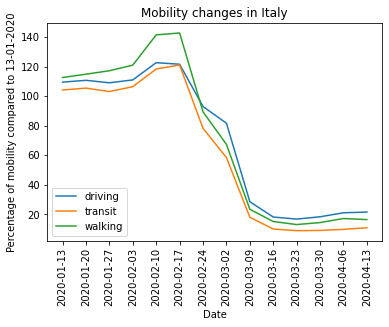

In [71]:

plt.plot(weeklyMobilityDataItaly)
plt.title("Mobility changes in Italy")
plt.xticks(rotation=90)
plt.ylabel("Percentage of mobility compared to 13-01-2020")
plt.xlabel("Date")
legend = list(weeklyMobilityDataItaly.columns)
plt.legend(legend, loc='lower left')
plt.show()


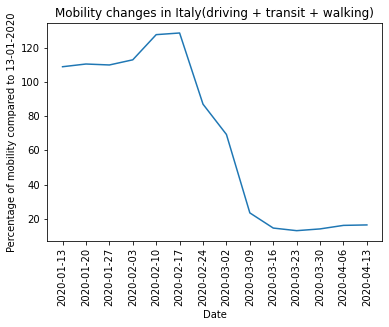

In [72]:
AggWeeklyMobilityDataItaly = weeklyMobilityDataItaly.mean(axis=1) #average over driving+transit+walking

plt.plot(AggWeeklyMobilityDataItaly)
plt.title("Mobility changes in Italy(driving + transit + walking)")
plt.xticks(rotation=90)
plt.ylabel("Percentage of mobility compared to 13-01-2020")
plt.xlabel("Date")
plt.show()

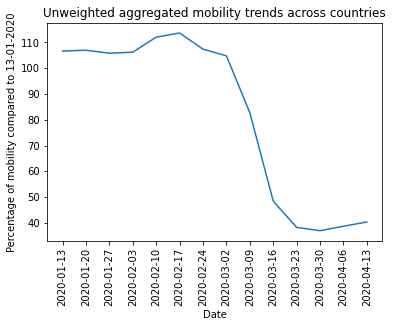

In [73]:
#World mobility over all countries/each country given same weight
mobilityCountries  = appleMobilityData.loc[appleMobilityData['geo_type'] == "country/region"]
mobilityCountriesMixed = mobilityCountries.drop(columns = ['geo_type', 'region', 'transportation_type']);
weeklyMobilityCountriesMixed = pd.DataFrame(new_case_count(mobilityCountriesMixed))
weeklyMobilityCountriesMixed = weeklyMobilityCountriesMixed.mean(axis=1)

plt.plot(weeklyMobilityCountriesMixed)
plt.title("Unweighted aggregated mobility trends across countries")
plt.xticks(rotation=90)
plt.ylabel("Percentage of mobility compared to 13-01-2020")
plt.xlabel("Date")
plt.show()

In [74]:
#Extended apple mobility trends
DATA_PATH = "data/"
APPLE_MOBILITY_DATASET = DATA_PATH + "applemobilitytrends.csv"
appleMobilityData = pd.read_csv(APPLE_MOBILITY_DATASET)
appleMobilityData.head()


c:\Users\giann\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,149.58,156.76,156.76,151.02,157.86,185.12,196.62,173.11,173.21,171.09
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,161.71,215.31,221.62,211.34,189.25,244.22,231.90,154.93,223.97,223.45
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,93.32,97.74,102.63,106.26,111.81,145.45,158.56,99.20,100.82,114.56
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,88.58,126.43,133.06,135.64,142.40,178.26,172.83,98.96,126.57,139.29
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,123.95,116.32,132.29,134.97,145.09,146.34,125.79,136.60,139.01,146.75


In [75]:
appleMobilityData = appleMobilityData.drop(columns = ['alternative_name', 'country', 'sub-region'], axis=1);

In [76]:
mobilityItaly  = appleMobilityData.loc[appleMobilityData['region'] == "Italy"]
appleMobilityData.isnull().values.any() #no NaN values
mobilityItaly

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12
65,country/region,Italy,driving,100.0,102.63,105.41,106.18,114.69,127.45,110.65,...,160.40,145.69,149.97,153.63,161.28,180.13,199.24,189.55,164.01,170.59
66,country/region,Italy,transit,100.0,100.82,100.40,99.52,107.35,113.33,108.25,...,358.35,339.03,332.75,346.80,368.27,405.73,430.29,398.35,368.65,371.13
67,country/region,Italy,walking,100.0,102.10,104.86,107.32,122.71,142.38,109.49,...,210.96,182.43,192.05,190.58,213.43,253.88,294.05,257.32,224.51,232.29


In [82]:
mobilityItalyFiltered = mobilityItaly.drop(columns = ['geo_type', 'region' ,'transportation_type'], axis = 1)
mobilityItalyFiltered.index = ['driving', 'transit', 'walking']
mobilityItalyFiltered

,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12
driving,100.0,102.63,105.41,106.18,114.69,127.45,110.65,102.59,103.94,106.67,...,160.40,145.69,149.97,153.63,161.28,180.13,199.24,189.55,164.01,170.59
transit,100.0,100.82,100.40,99.52,107.35,113.33,108.25,102.14,99.04,100.05,...,358.35,339.03,332.75,346.80,368.27,405.73,430.29,398.35,368.65,371.13
walking,100.0,102.10,104.86,107.32,122.71,142.38,109.49,99.19,102.26,105.19,...,210.96,182.43,192.05,190.58,213.43,253.88,294.05,257.32,224.51,232.29


In [89]:
mobilityItalyFilteredT =  mobilityItalyFiltered.T
mobilityItalyFilteredT.index = pd.to_datetime(mobilityItalyFiltered.T.index)

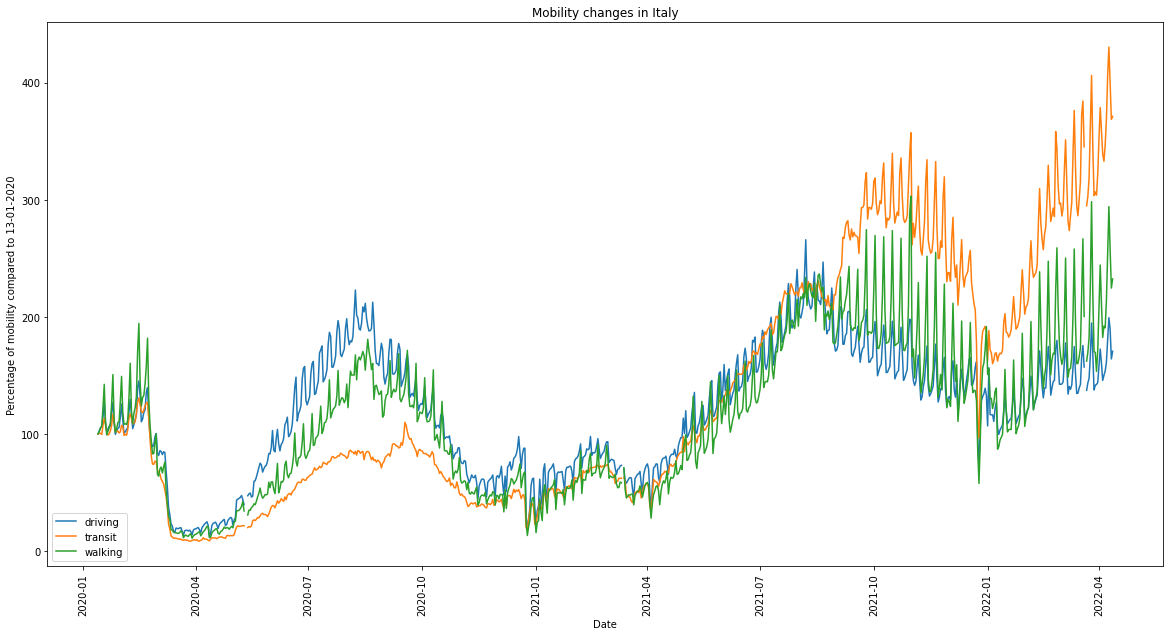

In [91]:

plt.figure(figsize=(20,10))
plt.plot(mobilityItalyFilteredT)
plt.title("Mobility changes in Italy")
plt.xticks(rotation=90)
plt.ylabel("Percentage of mobility compared to 13-01-2020")
plt.xlabel("Date")
#legend = list(mobilityItaly.columns)
plt.legend(legend, loc='lower left')
plt.show()

In [92]:
# converting list to DataFrame object
mobilityItalyFiltered.index = ['driving', 'transit', 'walking']
weeklyMobilityDataItaly = pd.DataFrame(new_case_count(mobilityItalyFiltered))
weeklyMobilityDataItaly.head(10)

,driving,transit,walking
2020-01-13,109.572857,104.238571,112.694286
2020-01-20,110.798571,105.520000,114.955714
2020-01-27,109.122857,103.200000,117.272857
2020-02-03,111.072857,106.491429,121.074286
2020-02-10,122.731429,118.468571,141.558571
2020-02-17,121.698571,121.125714,142.827143
2020-02-24,93.077143,78.302857,89.464286
2020-03-02,81.771429,58.552857,67.457143
2020-03-09,28.652857,18.112857,23.512857
2020-03-16,18.277143,10.160000,15.248571


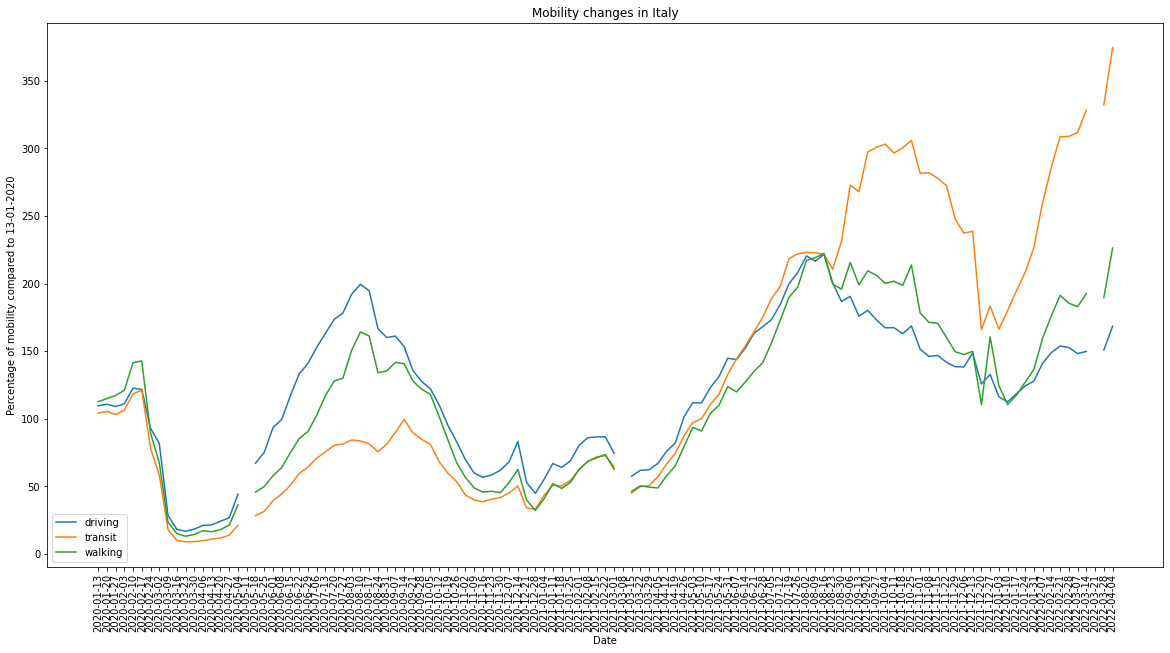

In [93]:
plt.figure(figsize=(20,10))
plt.plot(weeklyMobilityDataItaly)
plt.title("Mobility changes in Italy")
plt.xticks(rotation=90)
plt.ylabel("Percentage of mobility compared to 13-01-2020")
plt.xlabel("Date")
legend = list(weeklyMobilityDataItaly.columns)
plt.legend(legend, loc='lower left')
plt.show()